# Random Forest Clustering

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [32]:
iris = sns.load_dataset('iris')

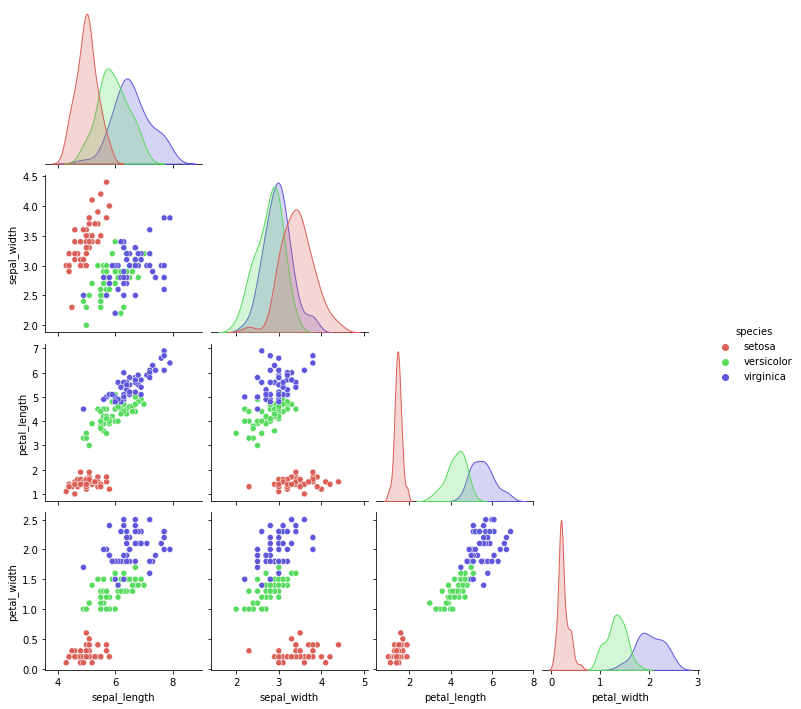

In [33]:
palette = sns.color_palette("hls", 3)
sns.pairplot(iris, hue='species', palette=palette, corner=True)

In [34]:
X = iris.drop('species', axis=1)
y = LabelEncoder().fit_transform(iris.species)

rf = RandomForestClassifier().fit(X, y)

In [35]:
for name, importance in zip(rf.feature_names_in_, rf.feature_importances_):
    print("{} importance: {:.2%} ".format(name, importance))

sepal_length importance: 8.42% 
sepal_width importance: 2.45% 
petal_length importance: 42.32% 
petal_width importance: 46.81% 


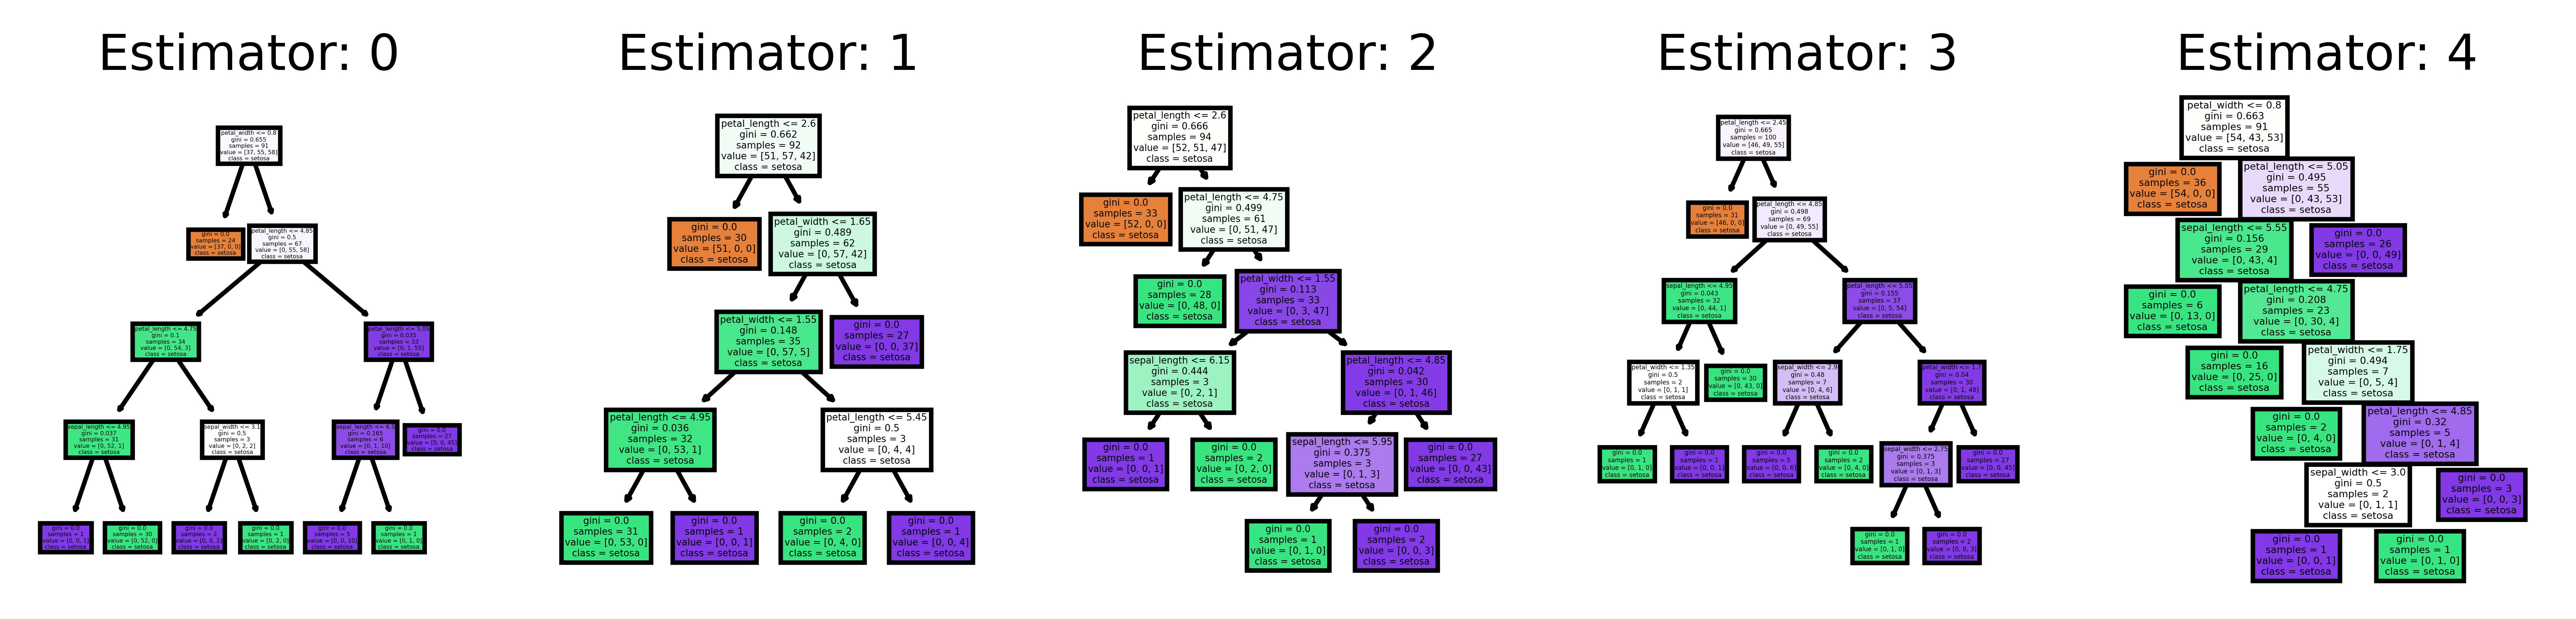

In [38]:
# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = rf.feature_names_in_,
                   class_names=iris.species,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_5trees.png')